<a href="https://colab.research.google.com/github/amulyadevkota/Garbage-detection-computer-vision-/blob/main/garbage_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()





In [ ]:
# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

In [ ]:
# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 8, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 14730 (delta 2), reused 7 (delta 2), pack-reused 14722
Receiving objects: 100% (14730/14730), 13.25 MiB | 24.77 MiB/s, done.
Resolving deltas: 100% (10016/10016), done.


In [ ]:
# change makefile to have GPU and OPENCV enabled
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile
!sed -i 's/CUDNN_HALF=0/CUDNN_HALF=1/' Makefile

/content/darknet


In [ ]:
# verify CUDA
!/usr/local/cuda/bin/nvcc --version

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2020 NVIDIA Corporation
Built on Wed_Jul_22_19:09:09_PDT_2020
Cuda compilation tools, release 11.0, V11.0.221
Build cuda_11.0_bu.TC445_37.28845127_0


In [ ]:
# make darknet (builds darknet so that you can then use the darknet executable file to run or train object detectors)
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -DCUDNN_HALF -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -DCUDNN_HALF -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:926:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1127:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
  

In [ ]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()

# use this to upload files
def upload():
  from google.colab import files
  uploaded = files.upload() 
  for name, data in uploaded.items():
    with open(name, 'wb') as f:
      f.write(data)
      print ('saved file', name)

# use this to download a file  
def download(path):
  from google.colab import files
  files.download(path)

In [ ]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/content
Mounted at /content/gdrive


In [ ]:
# this creates a symbolic link so that now the path /content/gdrive/My\ Drive/ is equal to /mydrive
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

'$11122020$49158Mr.keshav raj devkota191Nondescriptive .pdf'
 20140111_134043.mp4
 20190228_100323.jpg
 20190228_100331.jpg
 20190228_100341.jpg
 AI
 algo_data_literature_ref.docx
 archive.zip
'China 2018.zip'
 Classroom
'Colab Notebooks'
'Copy of archive.zip'
'Cover page.docx'
'Digital logic.pdf'
'Fundamentals of Engineering Economics Third Edition by Chan S. Park, Pravin Kumar and Nand Kumar.pdf'
'How to get started with Drive.pdf'
 IMDB-Movie-Data.csv
'Lab 1 HARRY complete4752737403490798113.docx'
 math3.pdf
'Minor Diagrams'
 minoredit2.docx
 minor.pptx
'Mona Devkota (1).gdoc'
'Mona Devkota.docx'
'Mona Devkota.gdoc'
'My Drive'
 PhotoCopier.mdj
 Project-III.docx
 testdata1
 uniredomain.mdj
 yolov4
'yolov4-obj_last (1).weights'
 yolov4_pa_pla


In [ ]:
# cd back into the darknet folder to run detections
%cd darknet

/content/darknet


In [ ]:
!ls /mydrive/yolov4_pa_pla

backup		  generate_train.py  obj.names	test.zip
generate_test.py  obj.data	     obj.zip	yolov4-obj.cfg


In [ ]:
# copy over both datasets into the root directory of the Colab VM (comment out test.zip if you are not using a validation dataset)
!cp /mydrive/yolov4_pa_pla/obj.zip ../
!cp /mydrive/yolov4_pa_pla/test.zip ../

In [ ]:
!unzip ../obj.zip -d data/
!unzip ../test.zip -d data/

Archive:  ../obj.zip
 extracting: data/obj/_darknet (2).labels  
 extracting: data/obj/_darknet.labels  
  inflating: data/obj/0440dc75f6fc548c9a7949c428830846_jpg.rf.9223cab3f08489e2eef4e12dee816a65.jpg  
  inflating: data/obj/0440dc75f6fc548c9a7949c428830846_jpg.rf.9223cab3f08489e2eef4e12dee816a65.txt  
  inflating: data/obj/0440dc75f6fc548c9a7949c428830846_jpg.rf.c11fdefe53e1fe603404140e1e8d54cb.jpg  
  inflating: data/obj/0440dc75f6fc548c9a7949c428830846_jpg.rf.c11fdefe53e1fe603404140e1e8d54cb.txt  
  inflating: data/obj/0440dc75f6fc548c9a7949c428830846_jpg.rf.f9a514806259e179bc0214e3b4e0df7d.jpg  
  inflating: data/obj/0440dc75f6fc548c9a7949c428830846_jpg.rf.f9a514806259e179bc0214e3b4e0df7d.txt  
  inflating: data/obj/1_jpg.rf.130df7ab843b281d63dfe82b3d303a54.jpg  
  inflating: data/obj/1_jpg.rf.130df7ab843b281d63dfe82b3d303a54.txt  
  inflating: data/obj/1_jpg.rf.a33da8f55896964234cca615d676f377.jpg  
  inflating: data/obj/1_jpg.rf.a33da8f55896964234cca615d676f377.txt  
  inflati

In [ ]:
# upload the custom .cfg back to cloud VM from Google Drive
!cp /mydrive/yolov4_pa_pla/yolov4-obj.cfg ./cfg

In [ ]:
# upload the obj.names and obj.data files to cloud VM from Google Drive
!cp /mydrive/yolov4_pa_pla/obj.names ./data
!cp /mydrive/yolov4_pa_pla/obj.data  ./data

In [ ]:
# upload the generate_train.py and generate_test.py script to cloud VM from Google Drive
!cp /mydrive/yolov4_pa_pla/generate_train.py ./
!cp /mydrive/yolov4_pa_pla/generate_test.py ./

In [ ]:
!python generate_train.py
!python generate_test.py

In [ ]:
# verify that the newly generated train.txt and test.txt can be seen in our darknet/data folder
!ls data/

9k.tree     giraffe.jpg		      labels		person.jpg  voc.names
coco9k.map  goal.txt		      obj		scream.jpg
coco.names  horses.jpg		      obj.data		test
dog.jpg     imagenet.labels.list      obj.names		test.txt
eagle.jpg   imagenet.shortnames.list  openimages.names	train.txt


In [ ]:

!./darknet detector train data/obj.data cfg/yolov4-obj.cfg yolov4.conv.137 -dont_show -map

Streaming output truncated to the last 5000 lines.
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.573562), count: 18, class_loss = 4.436576, iou_loss = 2.830929, total_loss = 7.267505 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.595080), count: 29, class_loss = 5.169168, iou_loss = 0.732312, total_loss = 5.901480 
 total_bbox = 426300, rewritten_bbox = 0.013371 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.605484), count: 7, class_loss = 1.731797, iou_loss = 3.983031, total_loss = 5.714828 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.616915), count: 19, class_loss = 3.960409, iou_loss = 2.342311, total_loss = 6.302720 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.723983), count: 28, class_loss = 3.018377, iou_loss = 0.964188, total_loss = 3.982565 
 total_bbox = 426354, rewritten_bbox = 0.013369 %

In [ ]:
# kick off training from where it last saved
!./darknet detector train data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights -dont_show

v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.000000), count: 1, class_loss = 0.049953, iou_loss = 0.000000, total_loss = 0.049953 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.850513), count: 23, class_loss = 3.456918, iou_loss = 4.605782, total_loss = 8.062700 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.785776), count: 22, class_loss = 1.055409, iou_loss = 0.799344, total_loss = 1.854753 
 total_bbox = 685363, rewritten_bbox = 0.008463 % 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 139 Avg (IOU: 0.877326), count: 3, class_loss = 0.611227, iou_loss = 1.484624, total_loss = 2.095851 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 150 Avg (IOU: 0.799200), count: 25, class_loss = 2.846473, iou_loss = 4.057092, total_loss = 6.903565 
v3 (iou loss, Normalizer: (iou: 0.07, obj: 1.00, cls: 1.00) Region 161 Avg (IOU: 0.807572), count: 25

 CUDA-version: 10010 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF

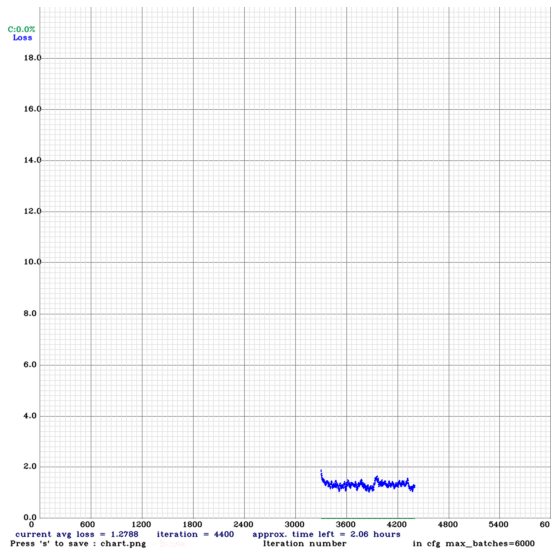

In [ ]:
!./darknet detector map data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4/backup/yolov4-obj_last.weights
imShow('chart.png')

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving predict.jpg to predict.jpg


 CUDA-version: 11000 (11020), cuDNN: 7.6.5, CUDNN_HALF=1, GPU count: 1  
 CUDNN_HALF=1 
 OpenCV version: 3.2.0
 0 : compute_capability = 750, cudnn_half = 1, GPU: Tesla T4 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   3 route  1 		                           ->  208 x 208 x  64 
   4 conv     64       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  64 0.354 BF
   5 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   6 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   7 Shortcut Layer: 4,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   8 conv  

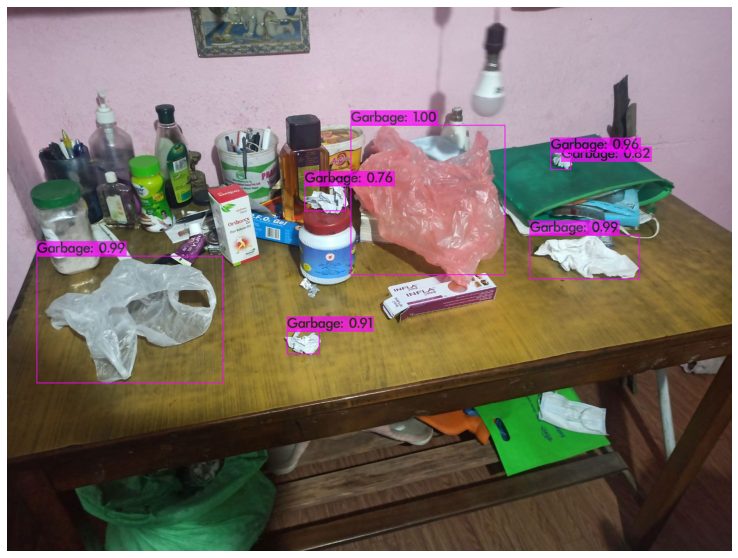

In [ ]:
#run detection
!./darknet detector test data/obj.data cfg/yolov4-obj.cfg /mydrive/yolov4_pa_pla/backup/yolov4-obj_last.weights /content/darknet/predict.jpg -thresh 0.7
imShow('predictions.jpg')